# Analyse Exploratoire des Pokémons

*(note : l'export html/pdf rend assez mal, le fichier notebook est plus joli dans la globalité. il est conseillé de lire ces notes depuis jupyter (ou autre éditeur notebook))*

(Pour le nettoyage des données, se référer au notebook [Data Cleaning](./Data_cleaning.ipynb) (./Data_cleaning.ipynb), Ce fichier ne s'occupera que de l'analyse du jeu de données.)


Pour commencer, on va d'abord importer toutes les librairies dont nous aurons besoin lors de cette analyse :

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from IPython.display import display,HTML
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools

# Problématique

Voici la problématique générale à laquelle nous souhaitons répondre dans cette analyse :

> _**Existe t-il des profils types de Pokémon selon leur catégorie ou leur type ?**_

---

Cette question sera découpée en plusieurs morceaux afin de faire des sous-problématiques plus ciblées, qui pourront nous éclaircir ou nous donner des parts de réponses.

Par exemple : **Les pokémons de type Dragon sont-ils statistiquement plus puissants que les autres types ?** (et autres...)

On cherchera surtout des catégories qui sortent du lot, ou des **Plus fort / Moins Fort** (en termes de variables de combat, puissance, etc...)

---

On commence avant tout par ouvrir le fichier csv avec pandas :

In [4]:
dfPokemon = pd.read_csv('./Datasets/MP-24-25_Cleaned.csv')

In [5]:
dfPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   generation        1045 non-null   int64  
 4   status            1045 non-null   object 
 5   species           1045 non-null   object 
 6   type_number       1045 non-null   int64  
 7   type_1            1045 non-null   object 
 8   type_2            553 non-null    object 
 9   height            1045 non-null   float64
 10  weight            1045 non-null   float64
 11  abilities_number  1045 non-null   int64  
 12  ability_1         1042 non-null   object 
 13  ability_2         516 non-null    object 
 14  ability_hidden    813 non-null    object 
 15  total_points      1045 non-null   int64  
 16  hp                1045 non-null   int64  


La colonne *'Unnamed: 0'* s'est glissé dans notre dataset, avant de continuer notre analyse, on va simplement retirer cette colonne :

In [7]:
dfPokemon = dfPokemon.drop(columns='Unnamed: 0')

# Définition des variables qui nous intéresseront dans notre étude, et Quantitatives/Qualitatives

> On ignorera les variables :
> - pokedex_number (simple index qui augmente, ça n'apporte pas d'intérêt de l'analyser)
> - name (même raisonnement, la colonne n'apporte pas d'éléments statistiques)
> > ce sont quand même deux colonnes que l'on gardera sans analyser pour les différencier, car certains pokémons existent sous plusieurs formes, et l'index du tableau ne reflète pas celui du numéro de pokédex. (identification)
> - ablities_number
> - ability_1
> - ability_2
> - hidden_ability
> - base_friendship
> - growth_rate
> - egg_types_number
> - egg_type_1
> - egg_type_2
> - percentage_male
> - egg_cycles
> - against_*

On pourra peut être se servir des variables ***height et weight***, pour voir si le poids influe ou non sur certaines performances.

> même si l'analyse pourrait être très intéressante, on ne considèrera pas les données sur les oeufs ici.

Pour le reste des variables :

> **1. Qualitatives :**
>    - status (Normal, demi-légendaire, mythique, etc.)
>    - species
>    - type_1
>    - type_2
>    - generation
> 
> **2. Quantitatives:**
>    - height
>    - weight (potentiellement utilisables)
>    - total_points
>    - hp
>    - attack
>    - defense
>    - sp_attack
>    - sp_defense
>    - speed
>    - catch_rate
>    - base_experience

# Analyse univariée

## Analyse des variables quantitatives

Notre étude débutera donc avec une analyse univariée des variables quantitatives (utiles à notre exploration) de notre dataset nettoyé :

> Pour rappel, la signification des variables :
> - Count : le compte total de valeurs non nulles dans la colonne
> - mean : la moyenne des valeurs de la colonne
> - 25, 50, 75 : Valeur au 25ème centile, Valeur médiane et Valeur au 75ème centile
> - min, max : Valeurs minimales et maximales de la colonne
> - Kurtosis : Dispersion des données (Plutôt en pic ou plat ?)
> - Skewness : Distribution des données (plutôt penchée à gauche ou à droite ?)

Les boxplots (boîtes à moustaches) fonctionnent de la manière suivante :

Les moustaches représentent le maximum et minimum, que l'on peut retrouver dans la description au dessus.

La boite de couleur représente toutes les valeurs entre le 25ème et 75ème centile, comme mentionné précédemment.

La ligne dans la boîte de couleur (généralement orange) représente la valeur médiane.

***Les variables de statistiques auront droit à une analyse particulière pour leur analyse, et seront donc exclues de cette mini analyse, on fera une observation de ces variables avant de passer aux stats***

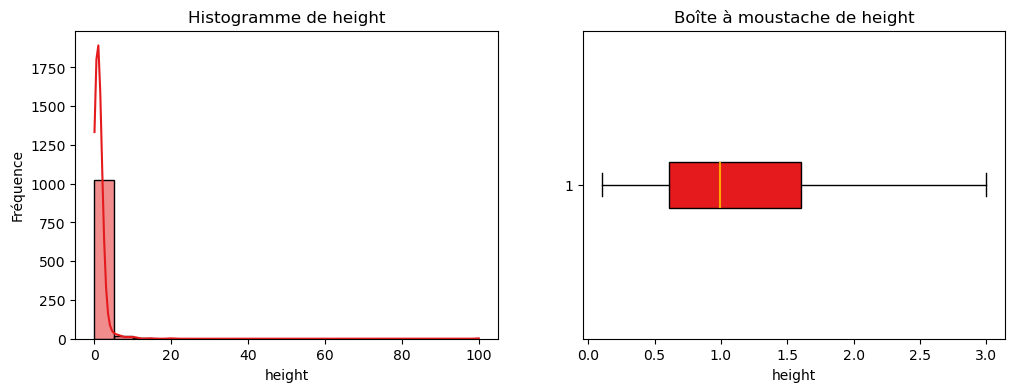

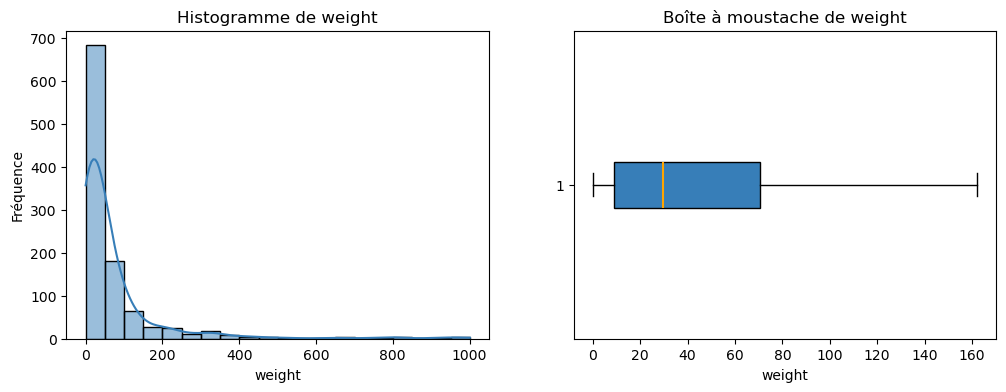

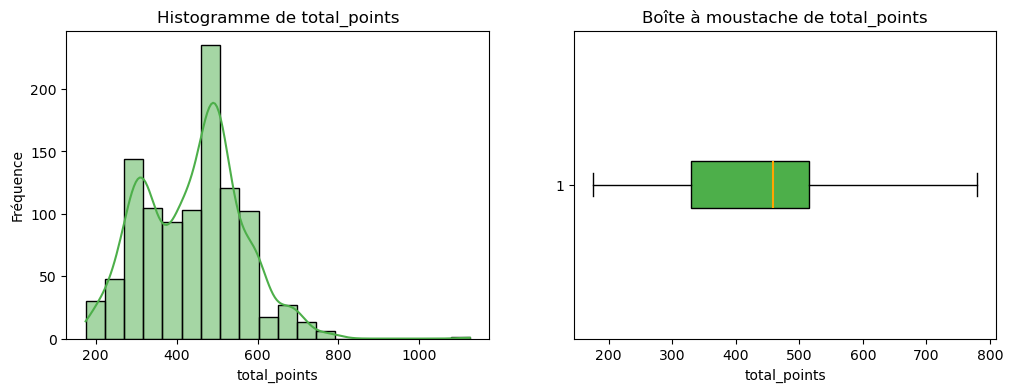

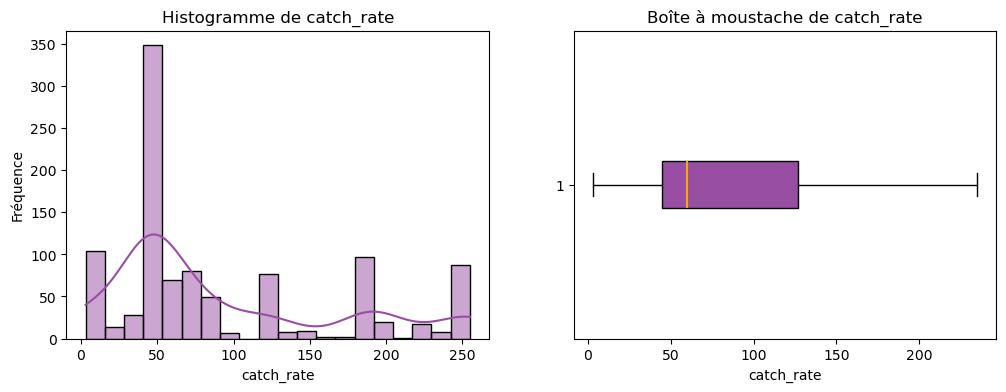

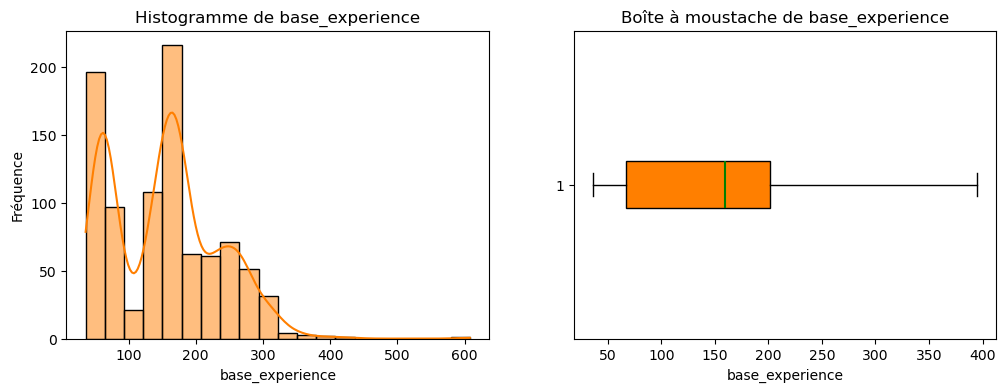

In [10]:
univarColumnList = ['height', 'weight', 'total_points', 'catch_rate', 'base_experience']
Colors = sns.color_palette('Set1')

for index, column in enumerate(univarColumnList):
    stats = dfPokemon[column].describe()
    stats['kurtosis'] = dfPokemon[column].kurt()
    stats['skewness'] = dfPokemon[column].skew()

    html_block = f"""
    <div style="border:1px solid #ddd; padding:12px; margin-top:20px; margin-bottom:10px; border-radius:8px; background-color:#fefefe; color: #000000">
        <h3 style="margin-top:0;">Analyse univariée : <i>{column}</i></h3>
        <ul style="margin-left:15px;">
            <li><b>Count</b> : {stats['count']:.0f}</li>
            <li><b>Mean</b> : {stats['mean']:.2f}</li>
            <li><b>Std</b> : {stats['std']:.2f}</li>
            <li><b>Min</b> : {stats['min']:.2f}</li>
            <li><b>25%</b> : {stats['25%']:.2f}</li>
            <li><b>50% (Median)</b> : {stats['50%']:.2f}</li>
            <li><b>75%</b> : {stats['75%']:.2f}</li>
            <li><b>Max</b> : {stats['max']:.2f}</li>
            <li><b>Skewness</b> : {stats['skewness']:.2f}</li>
            <li><b>Kurtosis</b> : {stats['kurtosis']:.2f}</li>
        </ul>
    </div>
    """
    display(HTML(html_block))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(dfPokemon[column].dropna(), bins=20, kde=True, color=Colors[index], ax=axes[0])
    axes[0].set_title(f"Histogramme de {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Fréquence")

    axes[1].boxplot(dfPokemon[column].dropna(), vert=False, showfliers=False, patch_artist=True, boxprops = dict(facecolor = Colors[index]), medianprops = dict(color = 'orange' if index != 4 else 'green', linewidth = 1.5))
    axes[1].set_title(f"Boîte à moustache de {column}")
    axes[1].set_xlabel(column)
    plt.show()

> **Il est important de noter que les boîtes à moustaches ont été tronquées et que les valeurs "outliers" ont été exclues de l'affichage, car certaines variables sont très éparpillées et auraient rendu l'affichage illisible**

Analyse des variables et hypothèses :

Pour la plupart des variables, un Pokémon se distingue particulièrement et génère des valeurs absurdes (surtout dans masse et taille) : Ethernatos Etermax (pokémon le plus grand, plus lourd et avec le plus de statistiques de base pour sa version Infinimax), on ignorera la plupart des observations causées par ce pokémon, pour se concentrer sur un tout plûtot qu'une anomalie.

1. height

   La variable height est très concentrée sur l'intervalle \[ 0.6;1.6 \] et n'est pas du tout symétrique. La valeur de kurtosis et l'écart type indiquent tous les deux que les valeurs sont fortement condensées. La taille maximale observée est de 100m. Considéré le manque d'hétérogénéité de la variable, il est peu probable que la taille ait une influence sur l'existance d'un profil type de Pokémon (pour les pokemons Normaux). Il est cependant possible que les pokémons légendaires présentent une taille plus élevée 

2. weight

   Même remarque que pour height, la variable weight est plus dispersée, mais ne présente pas beaucoup plus de symétrie. la valeur kurtosis et l'écart-type étant très élevés, cela prouve que la densité est fortement concentrée autour de la moyenne. weight a aussi probablement peu d'impact dans le profilage des Pokémons normaux.


Hypothèse (1) : Comme les deux variables weight et height présentent des profils d'histogrammes similaires, il est logique de penser que plus un Pokémon est grand; plus il est susceptible d'être lourd (et inversement). La matrice de corrélation nous aidera surement à voir si les deux variables sont effectivement fortement corrélées ou non.

3. total_points

   La variable total points se comporte de manière assez logique et est assez symétrique en plus d'être équilibrée . on remarque qu'elle pointe surtout autour des valeurs \~300 et \~500. Autour de ces valeurs, on remarque quand même une fréquence assez élevée d'autres Pokémons. les indices Skewness et Kurtosis sont très faibles, ce qui indique une bonne répartition des valeurs, malgré un écart type important. On observe une brutale chute de la fréquence à partir de 600.

Hypothèses : 
- (2) Les Pokémons à plus de 600 points au total sont probablement corrélés à leur statut (normal, demi-légendaire, légendaire, mythique, etc.)
- (3) Les plus gros pics de fréquence sont dus aux Pokémons ayant deux évolutions, une donnée que nous n'avons pas dans ce dataset, mais qui serait intéressante à analyser et qui me semble le plus probable, comme la plupart des pokémons ont deux ou trois évolutions, les stats doivent plus ou moins finir en quinconce, car en général, les pokémons à trois evolutions sont plus puissants que ceux à 1 ou 2.

4. catch_rate

   La variable catch_rate est une variable assez difficile à interpréter car elle dépend de la méthode de calcul du jeu utilisé, et il n'est pas précisé, que ce soit dans le sujet ou sur le dataset dans kaggle, de quel jeu est extrait le rate proposé ici. il sera donc necessaire de faire une analyse rapide pour savoir comment interpréter la valeur du catch_rate d'un Pokémon. d'après bulbapedia (Poképedia anglais), le taux attribué à chaque pokemon est toujours situé entre 3 et 255, même si l'algorithme de calcul pour la capture est différent dans chaque jeu (voir [List of Pokémons by catch rate](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_catch_rate)). La variable est assez bien équilibrée (en regardant l'indice Kurtosis), et présente plusieurs gros pics à \[\~10, 45, 75, 90, \~120, 190, 255\].

Hypothèses : 
- (4) les valeurs de catch_rate, qui se situent entre 3 et 255, indiquent que plus le taux est bas, plus il est difficile de capturer le Pokémon.
- (5) Plus un pokémon est difficile à capturer, plus il est puissant.

5. base_experience

   Contrairement à ce qu'on pourrait penser au départ, la variable 'base_experience' ne représente pas le taux de base (au niveau 1) d'experience à obtenir pour faire augmenter le Pokémon. Ce taux représente simplement la quantité d'expérience obtenue lorsque le pokemon (sauvage) est vaincu. Il existe bel et bien une variable qui définit la quantité à obtenir pour faire augmenter le niveau, ou à quelle vitesse notre Pokémon évolue, mais c'est plus une question de catégorie de "courbe", plûtot qu'une variable individuelle. la variable est bien équilibrée et assez symétrique (voir nos deux indices habituels), on note que chaque Pokémon rapporte au minimum 36 points d'expériences quand ils sont vaincus.

   Pour plus de détails sur le fonctionnement de l'expérience : [Courbe d'expérience](https://www.pokepedia.fr/Courbe_d%27exp%C3%A9rience) (Poképédia)
   Pour faire simple, voici le diagramme représentant les différentes courbes possibles (source : Poképédia) :
   ![diagramme des courbes](.\images\Comparatif_courbe_experience.PNG)

Hypothèses : 

- (6) Plus un pokémon est rapporte d'experience une fois vaincu, plus il est puissant.
- (7) Plus un pokémon rapporte d'experience une fois vaincu, plus il est difficile à capturer.

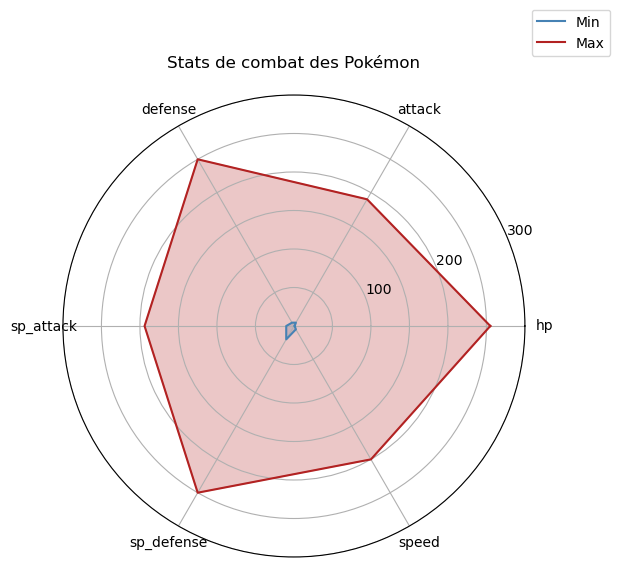

In [12]:
combat_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

min_vals = dfPokemon[combat_stats].min().values
max_vals = dfPokemon[combat_stats].max().values

min_vals = np.append(min_vals, min_vals[0])
max_vals = np.append(max_vals, max_vals[0])

angles = np.linspace(0, 2 * np.pi, len(combat_stats), endpoint=False)
angles = np.append(angles, angles[0])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, min_vals, label='Min', color='steelblue')
ax.fill(angles, min_vals, color='steelblue', alpha=0.25)

ax.plot(angles, max_vals, label='Max', color='firebrick')
ax.fill(angles, max_vals, color='firebrick', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(combat_stats)
ax.set_yticks([50, 100, 150, 200, 250, 300])
ax.set_yticklabels(['', '100', '', '200', '', '300'])
ax.set_title("Stats de combat des Pokémon", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()

**On voit bien que la répartition des statistiques est très parsemée.**

On va ajuster le minimum (on le multiplie x3) pour faire une analyse plus poussée :

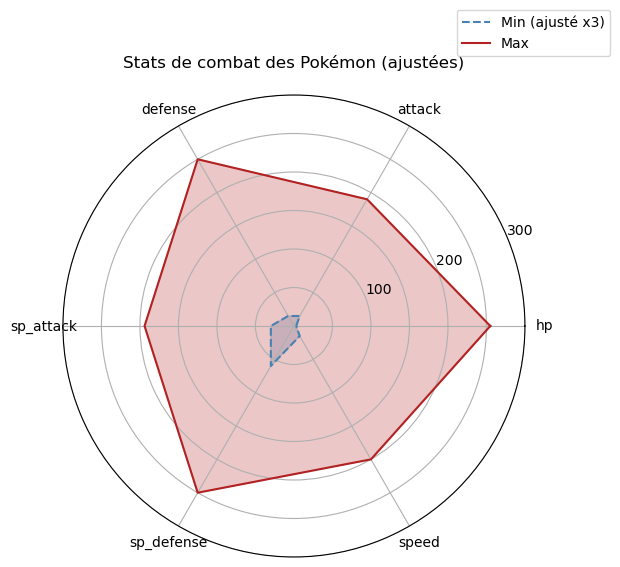

In [14]:
min_coeff = 3.0 

min_vals_adjusted = min_vals * min_coeff

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, min_vals_adjusted, label='Min (ajusté x3)', color='steelblue', linestyle='--')
ax.fill(angles, min_vals_adjusted, color='steelblue', alpha=0.25)

ax.plot(angles, max_vals, label='Max', color='firebrick')
ax.fill(angles, max_vals, color='firebrick', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(combat_stats)
ax.set_yticks([50, 100, 150, 200, 250, 300])
ax.set_yticklabels(['', '100', '', '200', '', '300'])
ax.set_title("Stats de combat des Pokémon (ajustées)", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()

On remarque assez facilement que :
 -  hp est la variable avec l'écart min/max le plus élevé (et le minimum le plus bas)
 -  paradoxalement, hp est aussi la variable la plus elévée
 -  sp_def est la moins écartée et a le minimum le plus élevé
 -  attack a le maximum le plus bas

> On ne remarque cependant pas de tendance particulière et que les pokémons sont très différents les uns des autres, ce qui consolide l'hypothèse d'une possible catégorisation ou l'existance de "profils types"

On trace un graphique type boxplot et violon sur ces stats pour faire apparaitre la densité et la fréquence des valeurs :

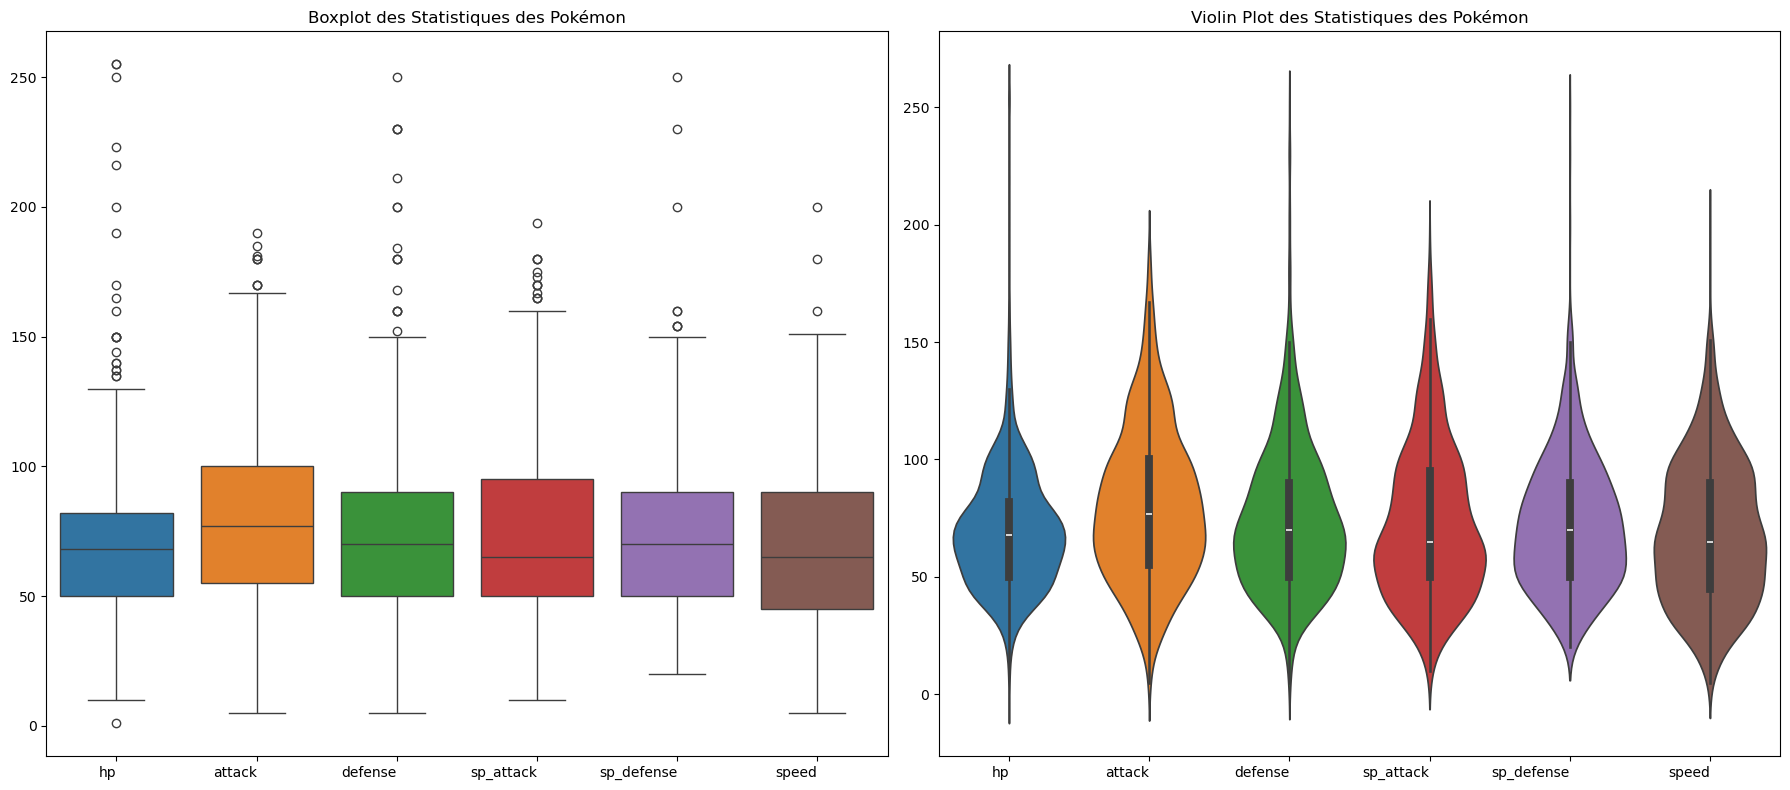

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(data=dfPokemon[combat_stats], ax=axes[0])
axes[0].set_title('Boxplot des Statistiques des Pokémon')
axes[0].set_xticks(range(len(combat_stats)))
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')

sns.violinplot(data=dfPokemon[combat_stats], ax=axes[1])
axes[1].set_title('Violin Plot des Statistiques des Pokémon')
axes[1].set_xticks(range(len(combat_stats)))
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

On remarque que la moyenne la plus haute est celle de l'attaque, et sp_attack la plus faible paradoxalement

Les valeurs extrêmes sur la variable hp apparaissent d'autant plus sur la boite à moustache.

Sur le diagramme en violon, on voit que speed est la variable la plus répartie et hétérogène, la densité étant fortement élevée tout le long du violon

> Dans l'ensemble, toutes les variables semblent assez bien réparties, et sont équilibrées, une variable ne prend pas le dessus sur les autres, et on se retrouve avec 95% des valeurs entre 20 et 200

## Analyse des variables qualitatives

On effectue désormais une analyse univariée des variables qualitatives

On commence par la répartition des types dans notre dataset :

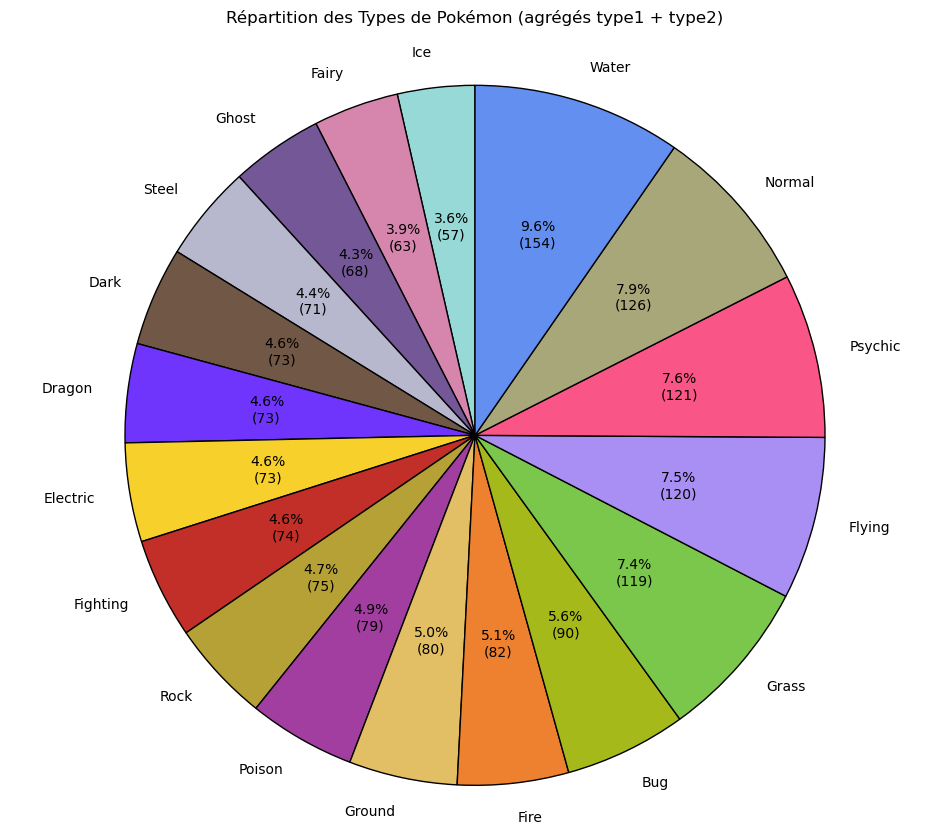

Total : 1598


In [19]:
type_counts = dfPokemon['type_1'].value_counts() + dfPokemon['type_2'].value_counts()
type_counts = type_counts.sort_values(ascending=True)

type_color_dict = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

colors = [type_color_dict[type_] for type_ in type_counts.index]

def custom_autopct(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val:d})'


plt.figure(figsize=(12, 10))
plt.pie(type_counts, labels=type_counts.index, autopct=lambda pct: custom_autopct(pct, type_counts), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des Types de Pokémon (agrégés type1 + type2)', pad=20)
plt.axis('equal')
plt.show()

print(f"Total : {type_counts.sum()}")

Observations :
- Water est la variable la plus représentée avec 154 Pokémons ayant au moins un des deux de leur type étant Eau.
- Ice est la moins représentée avec seulement 57 Pokémons, c'est assez surpenant.
- On sait que le total représenté ici est de 1598 types. on sait donc que parmis nos 1045 lignes -> 1598 - 1045 = 553 Pokémons ayant un double type (553/1045 = 52.9% des pokémons ont un double type !)
- Il est en soit logique que le type "normal" se hisse en deuxième place, car la plupart des pokémons de type "vol" des anciennes générations ont le double type "normal"

Les types semblent être aussi bien équlibrés que les statistiques présentées au dessus.

Hypothèses : 
- (8) Il existe un type de Pokémon présentant des statistiques plus élevées que les autres.
- (9) Il existe un type de Pokémon plus difficile à attraper que les autres.

Passons à la répartition des espèces :

On a essayé d'afficher nos espèces sous forme de barplot, mais il semblerait que la variable espèce contienne trop de valeurs différentes, ce qui limite fortement son intérêt dans notre usage ici. On va donc simplement seulement récupérer les espèces avec strictement plus de 2 représentants par type. On les affichera dans un barplot.

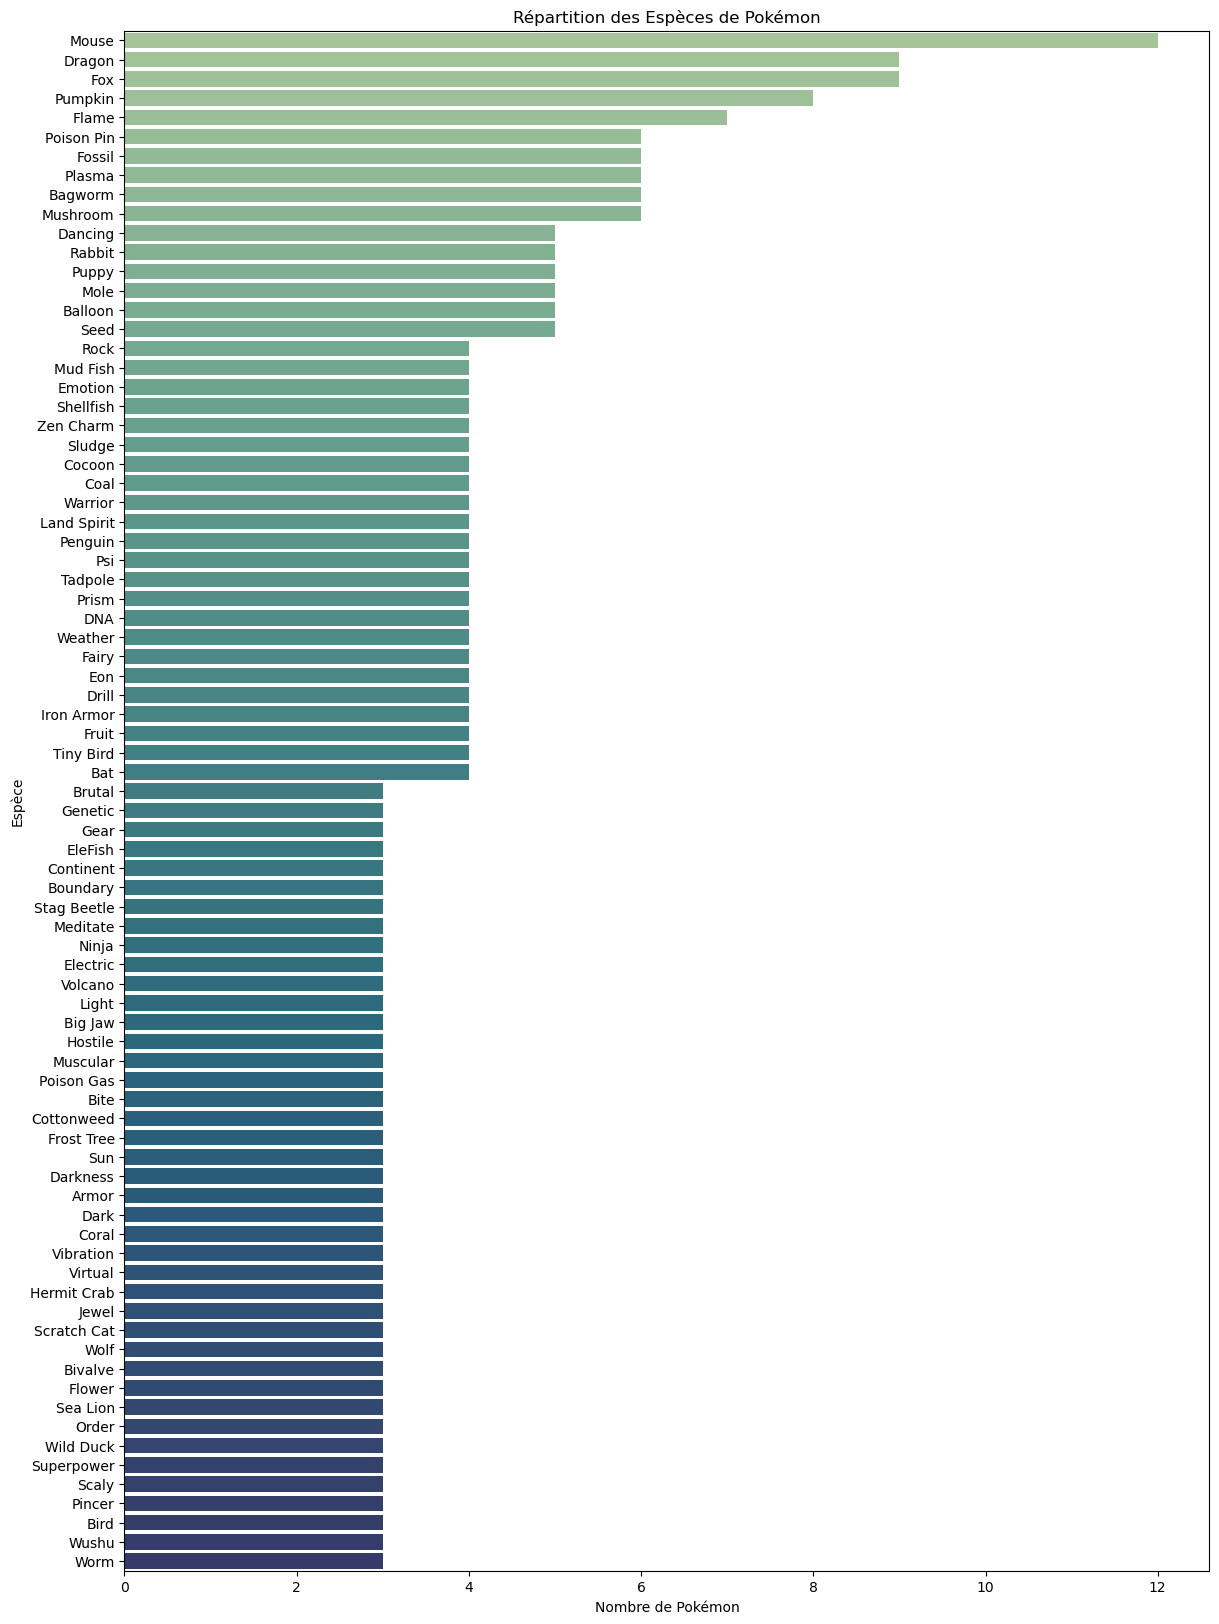

In [21]:
species_counts = dfPokemon['species'].value_counts()

displayed_species_counts = species_counts[species_counts.values > 2]
displayed_species_counts

plt.figure(figsize=(14, 20))
sns.barplot(y=displayed_species_counts.index, x=displayed_species_counts.values, hue=displayed_species_counts.index, palette='crest')
plt.title('Répartition des Espèces de Pokémon')
plt.xlabel('Nombre de Pokémon')
plt.ylabel('Espèce')
plt.show()

On observe que les 5 espèces les plus représentées sont : Mouse (12 occurences), Dragon (9 occurences), Fox (9 occurences), Pumpkin (8 occurences) et Flame (7 occurences)

Il apparait clairement que les espèces de pokémons sont très diversifiées, car la plupart des espèces ne possèdent qu'un seul ou deux représentant(s)

In [23]:
print(f"Seulement {round(displayed_species_counts.value_counts().sum() / species_counts.value_counts().sum(), 4) * 100}% des espèces ont été représentées dans ce graphique, ce qui prouve que les Pokémons sont très diversifiés")

Seulement 12.27% des espèces ont été représentées dans ce graphique, ce qui prouve que les Pokémons sont très diversifiés


Hypothèse : (10) Les espèces les plus représentées fondent-elles un profil type en statistiques ? en masse/taille ? en types ? en taux de capture ?

Continuons en étudiant les statuts des pokémon (Normal, Sous-légendaire, légendaire, mythique) :

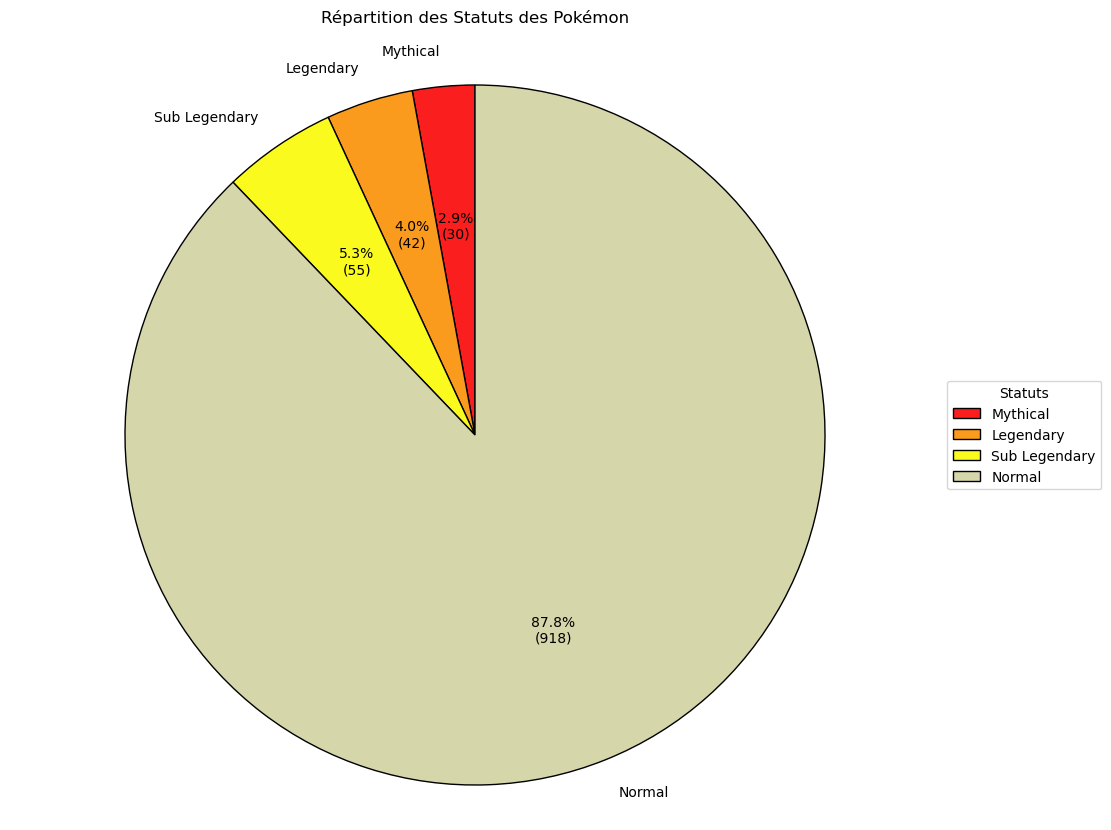

In [25]:
status_counts = dfPokemon['status'].value_counts()

status_counts = status_counts.sort_values(ascending=True)

status_colors = ['#fa1e1e','#fa9b1e','#fafa1e','#d6d6ab']

def custom_autopct(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val:d})'


plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, autopct=lambda pct: custom_autopct(pct, status_counts), startangle=90, colors=status_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des Statuts des Pokémon', pad=20)
plt.axis('equal') 


plt.legend(wedges, status_counts.index, title="Statuts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Il existe en tout 4 statuts de pokémons : Normal, Semi-légendaire, Légendaire, Mythique.

On observe que 87.8% des pokémons sont normaux, ce qui est un score en réalité assez bas quand on y réfléchit une deuxième fois.

En termes de statistiques de base, les Pokémon de statut 'Légendaire' ont en moyenne des statistiques de base plus élevées que les Pokémon de statut 'Normal'. On explorera cette question plus tard dans le document...

Hypothèses/Questions :
 - (11) Quelle est réellement la différence de statistiques entre les pokémons légendaires et non légendaires ?
 - (12) Y-a t'il un type plus représenté parmis les pokémons non normaux ? 

# Analyse Bivariée/Multivariée

> On essaiera de répondre à toutes les questions/hypothèses posées dans l'analyse univariée, **à noter que les questions ne seront pas traitées dans l'ordre, pour ajouter du rythme/des catégories au document**

Pour continuer notre analyse, nous allons passer à l'analyse bivariée/multivariée, en commençant par la matrice de corrélation, pour montrer à quel point les variables quantitatives sont corrélées les unes aux autres :

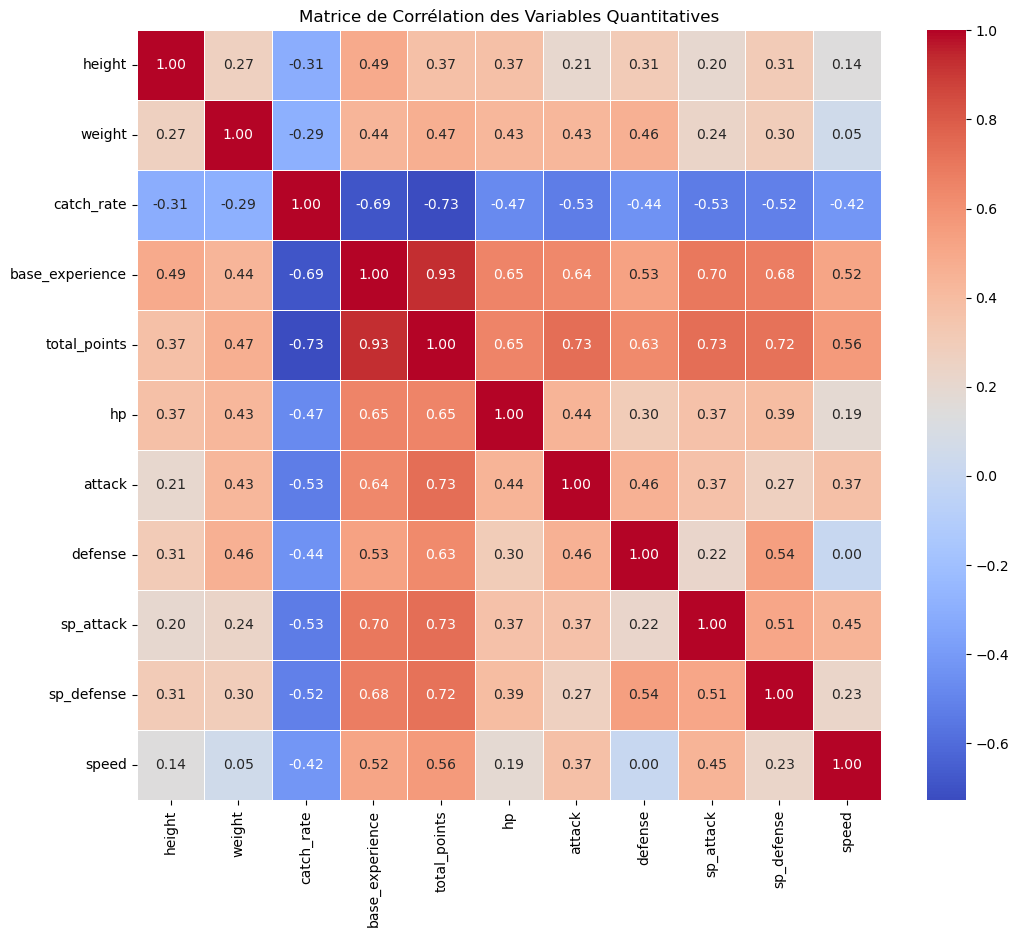

In [28]:
quantitative_columns = ['height', 'weight','catch_rate','base_experience', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

correlation_matrix = dfPokemon[quantitative_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Quantitatives')
plt.show()

Beaucoup d'observations intéressantes dans ce graphique :

Commençons par le plus évident, une forte corrélation entre le total de points et les différentes statistiques, rien de surprenant.

Notons quand même un taux à 0.54 entre def et sp_def.

les autres statistiques ne semblent pas avoir un taux trop corrélé les unes aux autres.

speed a l'air d'être la variable la plus indépendante de la liste.

---

## Réponse à l'hypothèse (1) : 

Avec un coefficient de 0.27, le taux ne suffit pas à prouver une corrélation entre les deux variables.

On apporte un test d'indépendance dans la cellule suivante pour affirmer ou non cette observation :

In [30]:
correlation, p_value = pearsonr(dfPokemon['height'], dfPokemon['weight'])

print(f"Coefficient de corrélation de Pearson : {correlation:.2f}")
print(f"P-value : {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une corrélation significative entre 'height' et 'weight'.")
else:
    print("Il n'existe pas de corrélation significative entre 'height' et 'weight'.")


Coefficient de corrélation de Pearson : 0.27
P-value : 0.0000
Il existe une corrélation significative entre 'height' et 'weight'.


On utilise un scatterplot pour afficher visuellement la corrélation entre les deux variables :

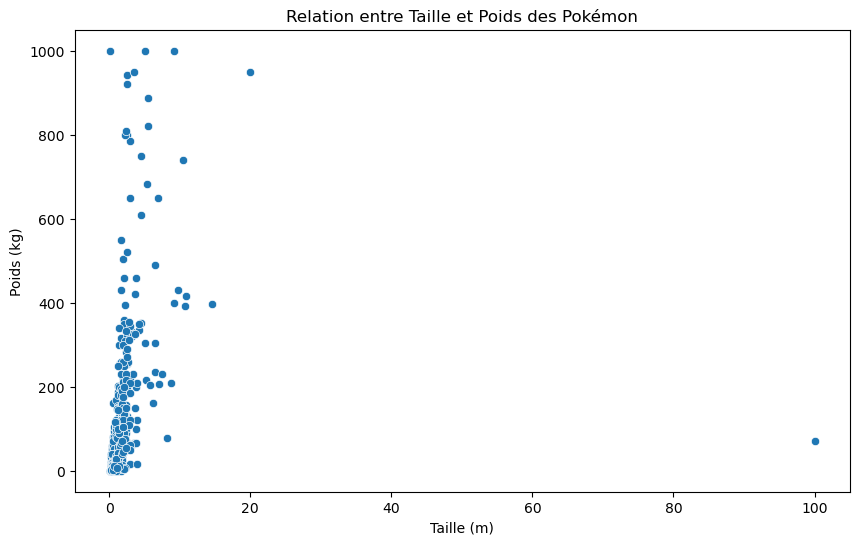

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=dfPokemon)
plt.title('Relation entre Taille et Poids des Pokémon')
plt.xlabel('Taille (m)')
plt.ylabel('Poids (kg)')
plt.show()


Il semblerait que d'après notre test de corrélation (pearson), il existe une corrélation significative entre height et weight. 

Cependant, même si la corrélation est significative, elle reste assez faible dans les faits.

> Ce résultat est sûrement dû au fait que nous analysons plusieurs centaines de Pokémon à la fois.

On peut donc en conclure que les deux variables sont liées, mais de manière forte ou linéaire.

---

Nous allons désormais essayer de répondre à la question (4), ce qui nous permettra de répondes aux hypothèses (5) et (6).

En toute logique, les pokémons ayant le statut **"normal"** sont plus faciles à attraper que les pokémons ayant un autre statut.

On peut donc tracer un lineplot pour faire apparaitre les taux de capture moyens de chaque groupe.

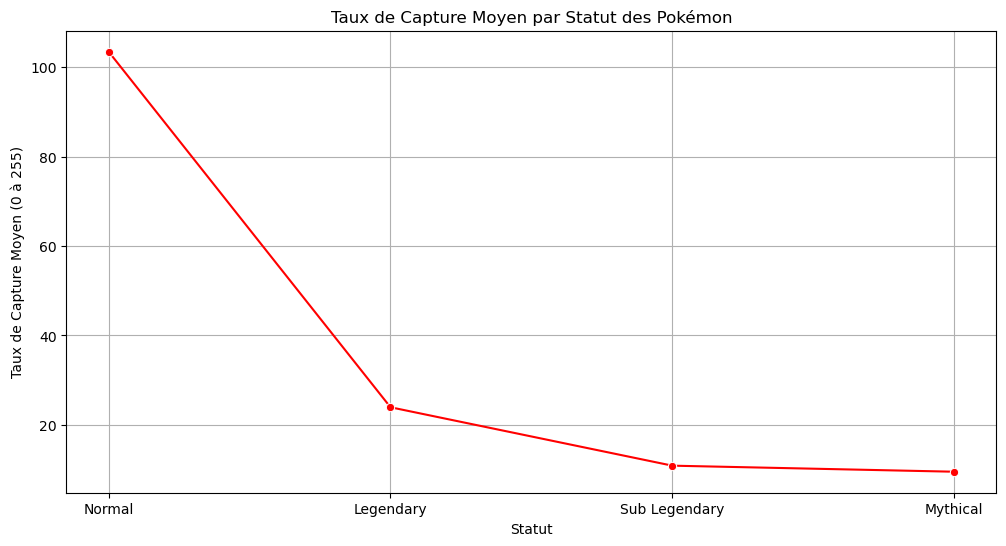

In [34]:
catch_rate_by_status = dfPokemon.groupby('status')['catch_rate'].mean().reset_index()

catch_rate_by_status = catch_rate_by_status.sort_values(by='catch_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='status', y='catch_rate', data=catch_rate_by_status, marker='o', color='red')
plt.title('Taux de Capture Moyen par Statut des Pokémon')
plt.xlabel('Statut')
plt.ylabel('Taux de Capture Moyen (0 à 255)')
plt.grid(True)
plt.show()

## Réponse à la question (4) : 

Le graphique montre clairement que plus un pokémon est rare (de son statut), plus il est difficile à capturer.

> Une observation hors de notre hypothèse est que le taux de capture des sous-légendaires est plus bas que celui des légendaires, une explication possible serait que beaucoup de légendaires sont inclus à l'histoire principale des jeux, et ces pokémons ont volontairement un taux de capture plus élevé que les autres (dans leur version histoire principale)

---

**Continuons l'analyse de notre matrice de corrélation :**

## Réponse à l'hypothèse (7) :

Il semble y avoir une corrélation très forte entre le taux de capture et l'expérience de base obtenue lors de la victoire contre un pokémon sauvage. la matrice de corrélation indique que plus le Pokémon rapporte de l'expérience, plus il est difficile à capturer (comme on sait que plus l'indice est bas, plus le pokémon est difficile à capturer).

Comme pour la masse et la taille, on va faire un test d'indépendance pour voir à quel point les deux variables sont liées :

In [37]:
df_basexp_catchrt = dfPokemon.dropna(subset=['base_experience', 'catch_rate']) # on surpprime les variables null des deux colonnes pour éviter une erreur

correlation, p_value = pearsonr(df_basexp_catchrt['base_experience'], df_basexp_catchrt['catch_rate'])

print(f"Coefficient de corrélation de Pearson : {correlation:.2f}")
print(f"P-valeur : {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une corrélation significative entre 'base_experience' et 'catch_rate'.")
else:
    print("Il n'existe pas de corrélation significative entre 'base_experience' et 'catch_rate'.")

Coefficient de corrélation de Pearson : -0.69
P-valeur : 0.0000
Il existe une corrélation significative entre 'base_experience' et 'catch_rate'.


On affiche notre résultat dans un scatterplot, en calculant en plus la régression :

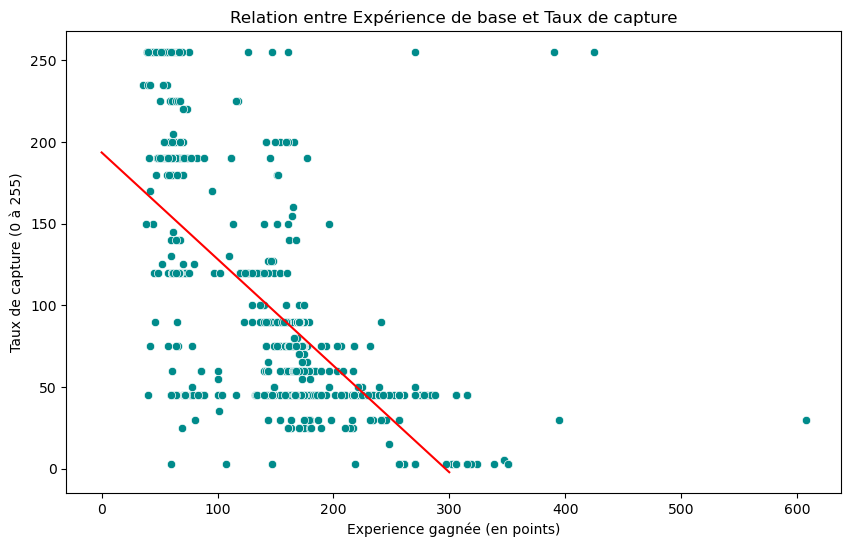

In [39]:
linreg = linregress(df_basexp_catchrt['base_experience'],df_basexp_catchrt['catch_rate'])
linregmin = linreg.slope * 0 + linreg.intercept
linregmax = linreg.slope * 300 + linreg.intercept
dfLinReg = pd.DataFrame(data={'base_experience':[0,300], 'catch_rate':[linregmin,linregmax]})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='base_experience', y='catch_rate', data=dfPokemon, color='darkcyan')
plt.plot(dfLinReg['base_experience'],dfLinReg['catch_rate'],color='red')
plt.title('Relation entre Expérience de base et Taux de capture')
plt.xlabel('Experience gagnée (en points)')
plt.ylabel('Taux de capture (0 à 255)')
plt.show()

On s'aperçoit très facilement que le taux de capture baisse drastiquement au fur et à mesure que les points d'expérience augmentent. La ligne de régression n'est pas tout à fait exacte, mais montre bien que le le taux baisse fortement.

**Cette observation confirme donc l'hypothèse (7).**

---

## Réponse à l'hypothèse (5) :

Toujours sur la matrice de corrélation, on observe un taux assez élevé entre la puissance globale et le taux de capture des Pokémons.

On applique donc la même méthode que précédemment, comme on a une variable quantitative :

In [42]:
df_total_catchrt = dfPokemon.dropna(subset=['catch_rate','total_points']) # on surpprime les variables null des deux colonnes pour éviter une erreur

correlation, p_value = pearsonr(df_total_catchrt['total_points'], df_total_catchrt['catch_rate'])

print(f"Coefficient de corrélation de Pearson : {correlation:.2f}")
print(f"P-valeur : {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une corrélation significative entre 'total_points' et 'catch_rate'.")
else:
    print("Il n'existe pas de corrélation significative entre 'total_points' et 'catch_rate'.")

Coefficient de corrélation de Pearson : -0.73
P-valeur : 0.0000
Il existe une corrélation significative entre 'total_points' et 'catch_rate'.


Comme pour les autres variables, il y a une corrélation significative entre les deux

On trace un regplot pour suivre l'évolution du taux de capture par rapport à la puissance :

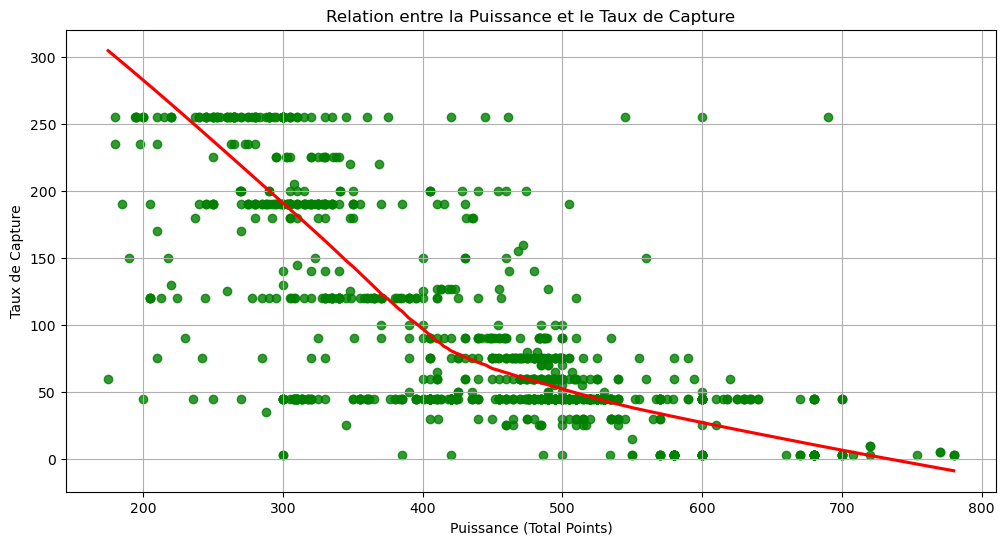

In [44]:
plt.figure(figsize=(12, 6))
sns.regplot(x='total_points', y='catch_rate', data=dfPokemon, line_kws={'color': 'red'},lowess=True, color='green')
plt.title('Relation entre la Puissance et le Taux de Capture')
plt.xlabel('Puissance (Total Points)')
plt.ylabel('Taux de Capture')
plt.grid(True)
plt.show()

Comme pour l'hypothèse (7), on remarque que le taux de capture baisse fortement quand la puissance augmente.

**Ce graphique confirme notre hypothèse (5)**.

---

## Réponse à l'hypothèse (6) :

Pour terminer avec les analyses uniquement portées sur les variables quantitatives, et en toute logique, on observe la très forte corrélation entre base_experience et total_points :

In [47]:
df_total_basexp = dfPokemon.dropna(subset=['base_experience','total_points']) # on surpprime les variables null des deux colonnes pour éviter une erreur

correlation, p_value = pearsonr(df_total_basexp['total_points'], df_total_basexp['base_experience'])

print(f"Coefficient de corrélation de Pearson : {correlation:.2f}")
print(f"P-valeur : {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une corrélation significative entre 'base_experience' et 'total_points'.")
else:
    print("Il n'existe pas de corrélation significative entre 'base_experience' et 'total_points'.")

Coefficient de corrélation de Pearson : 0.93
P-valeur : 0.0000
Il existe une corrélation significative entre 'base_experience' et 'total_points'.


Même méthode qu'avant, on prend un regplot :

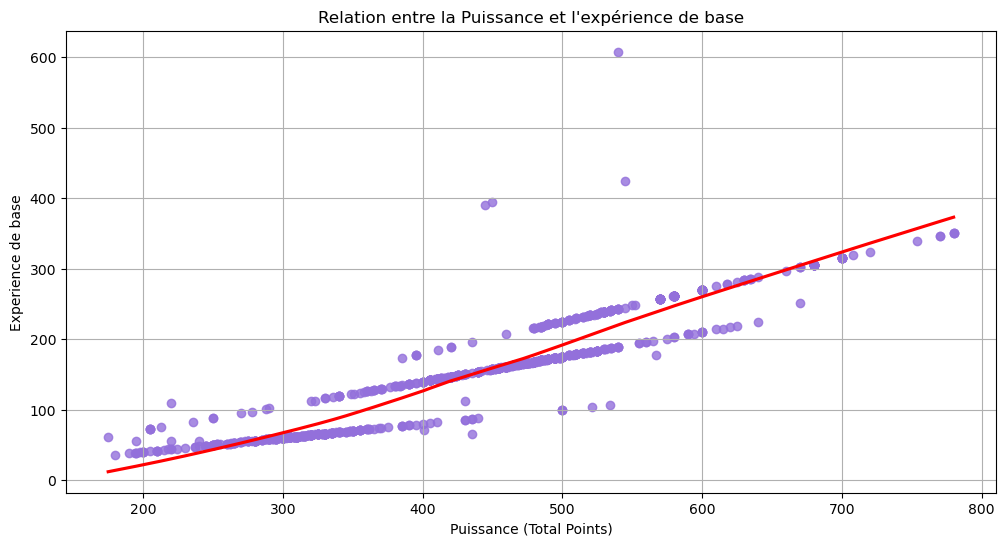

In [49]:
plt.figure(figsize=(12, 6))
sns.regplot(x='total_points', y='base_experience', data=dfPokemon, line_kws={'color': 'red'},lowess=True, color='mediumpurple')
plt.title('Relation entre la Puissance et l\'expérience de base')
plt.xlabel('Puissance (Total Points)')
plt.ylabel('Experience de base')
plt.grid(True)
plt.show()

On voit très clairement les trois lignes se former sur le graphique, les deux variables sont vraiment fortement liées.

L'hypothèse (6) est donc confirmée.

---

## Passons maintenant à l'hypothèse (2):

On va simplement regarder le nombre de Pokémons dans chaque catégorie en filtrant tout ceux qui ont plus de 600 points dans un barplot :

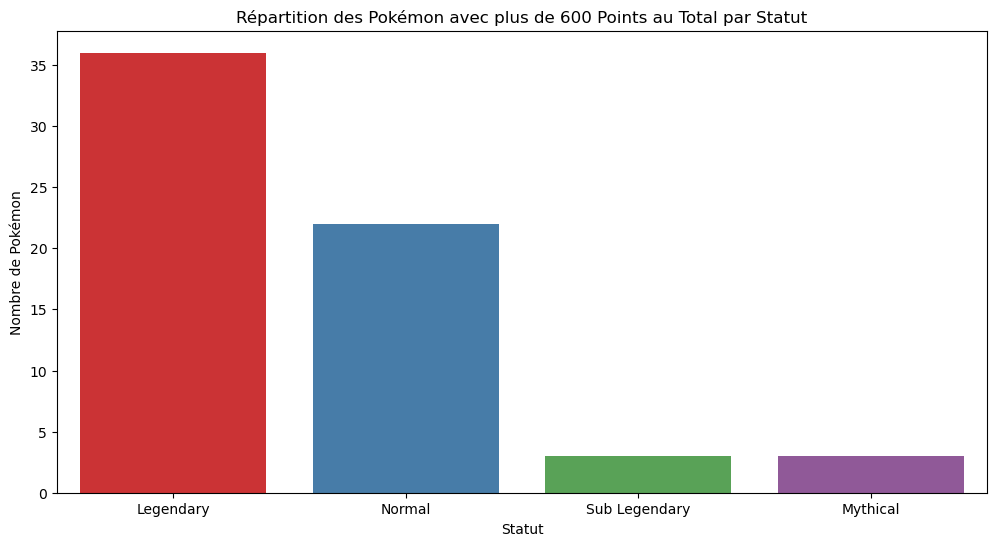

In [51]:
high_power_pokemon = dfPokemon[dfPokemon['total_points'] > 600]

status_counts = high_power_pokemon['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='status', y='count', data=status_counts, hue='status', palette='Set1')
plt.title('Répartition des Pokémon avec plus de 600 Points au Total par Statut')
plt.xlabel('Statut')
plt.ylabel('Nombre de Pokémon')
plt.show()

On observe que la plupart des Pokémons au dessus de 600 points totaux sont en effet légendaires, mais il a quand même beaucoup de Pokémons normaux au dessus de 600 points.

On peut donc en tirer la conclusion suivante : Les Pokémons à plus de 600 points totaux sont moyennement liés à leur status, il y a certes plus de pokémons non normaux dans la liste, mais les pokémons normaux représentent quand même une partie non négligeable de la liste.

**L'hypothèse (2) est donc rejetée.**

---

## Réponse à l'hypothèse (8) :

On trace un boxplot (type de graphique qui semble le plus évident pour ce genre de comparaisons) pour montrer les différences de statistiques entre tous les types :

> J'ai essayé de faire un grouped bar plot, avec les minimum est maximums de chaque type, mais ça ne rendait pas aussi bien que le boxplot.

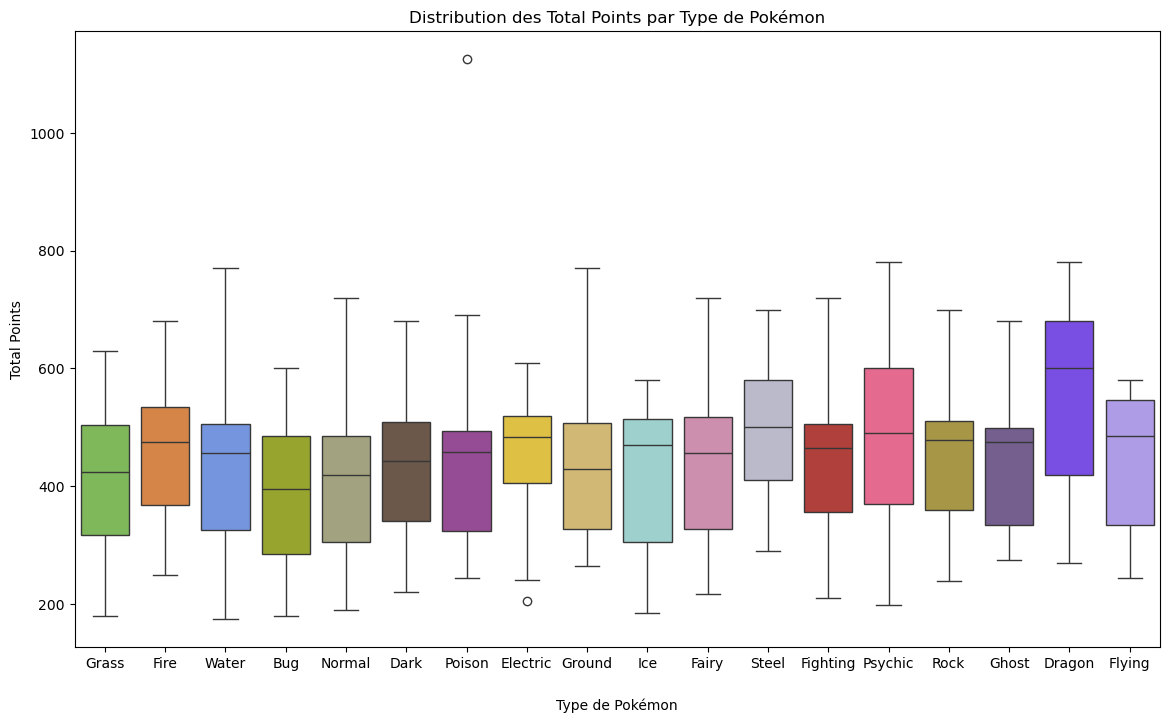

In [54]:
colors = [type_color_dict[type_] for type_ in dfPokemon['type_1'].unique()]

plt.figure(figsize=(14, 8))
sns.boxplot(x='type_1', y='total_points', data=dfPokemon, hue='type_1', palette=colors)
plt.title('Distribution des Total Points par Type de Pokémon')
plt.xlabel('Type de Pokémon', labelpad=20)
plt.ylabel('Total Points')

plt.show()

On remarque que les pokémons de type dragon présentent des statistiques beaucoup plus élevées que la moyenne.

Le type glace, déjà sous représenté, n'est pas très puissant avec l'un des minimum les plus bas.

Le type eau est le plus écarté.

Les types qui se démarquent surtout sont : Feu, Eau, Electrique, Sol, Psy, Acier, Dragon et Vol.

Cela confirme notre hypothèse (8), en nous apportant la réponse suivante : Le type dragon semble avoir les pokémons avec les plus hautes statistiques.

---

## Réponse à l'hypothèse (9) : 

À l'image de la réponse précédente, comme on suit la même colonne, on chercher à définir les taux de capture les plus extrêmes par type. Nous allons donc utiliser la même méthode, en analysant un boxplot :

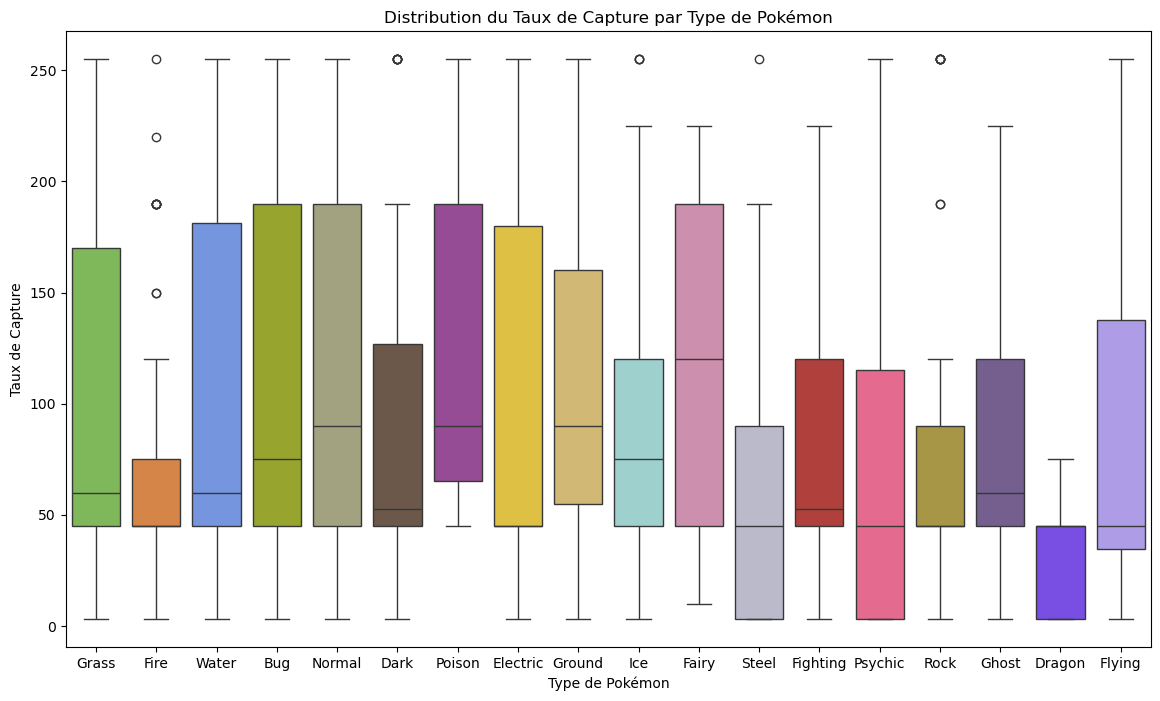

In [57]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='type_1', y='catch_rate', data=dfPokemon, hue='type_1', palette=colors)
plt.title('Distribution du Taux de Capture par Type de Pokémon')
plt.xlabel('Type de Pokémon')
plt.ylabel('Taux de Capture')
plt.show()

On remarque très facilement que les types les plus difficiles à attraper sont :
-  Feu
-  Acier
-  Psy
-  Roche
-  Dragon (encore une fois)

> Ce résultat est en réalité assez logique, comme on a une corrélation assez élevée entre la puissance et le taux de capture, les types les plus puissants sont aussi les plus durs à attraper.


Réponse : Oui il existe un type plus difficile à attraper, et celui dépend beaucoup de sa puissance, les type Acier et dragon semblent les plus durs à attraper

---

## Réponse à la question (10) :

Pour la question (10), comme elle regroupe beaucoup de questions à la fois, on tracera d'abord tous nos graphiques et on en tirera une conclusion.

On limitera aussi le nombre d'espèces représentées à **20**, comme les Pokémons sont très diversifiés. 

Voici nos graphiques :

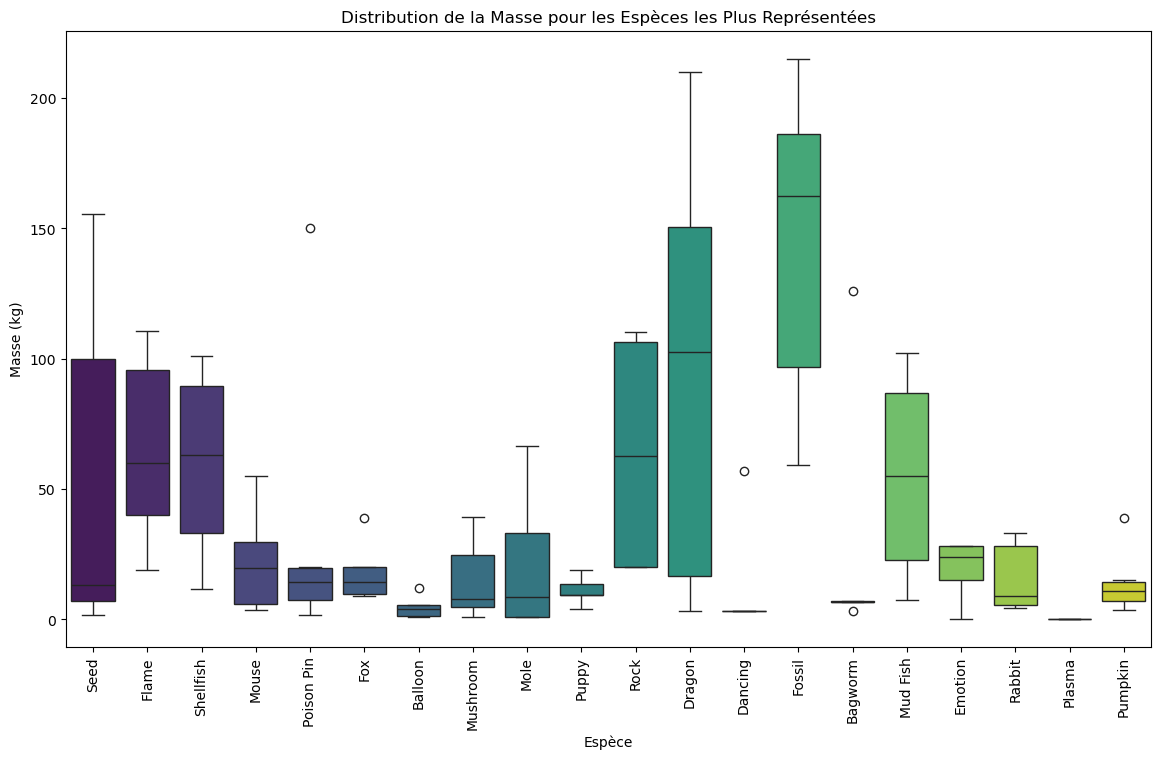

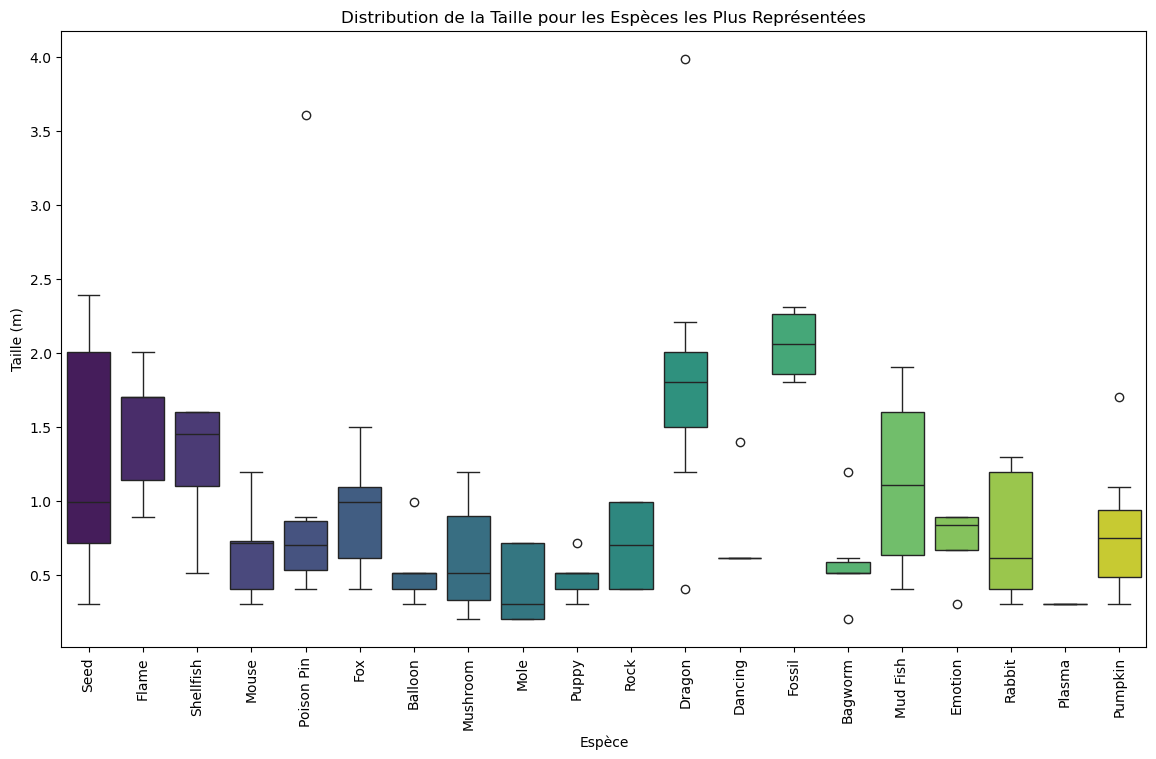

In [60]:
top_species = dfPokemon['species'].value_counts().nlargest(20).index
filtered_df = dfPokemon[dfPokemon['species'].isin(top_species)]

# boxplot masse
plt.figure(figsize=(14, 8))
sns.boxplot(x='species', y='weight', data=filtered_df, hue='species', palette='viridis')
plt.title('Distribution de la Masse pour les Espèces les Plus Représentées')
plt.xlabel('Espèce')
plt.xticks(rotation=90)
plt.ylabel('Masse (kg)')
plt.show()

# boxplot taille
plt.figure(figsize=(14, 8))
sns.boxplot(x='species', y='height', data=filtered_df, hue='species', palette='viridis')
plt.title('Distribution de la Taille pour les Espèces les Plus Représentées')
plt.xlabel('Espèce')
plt.xticks(rotation=90)
plt.ylabel('Taille (m)')
plt.show()

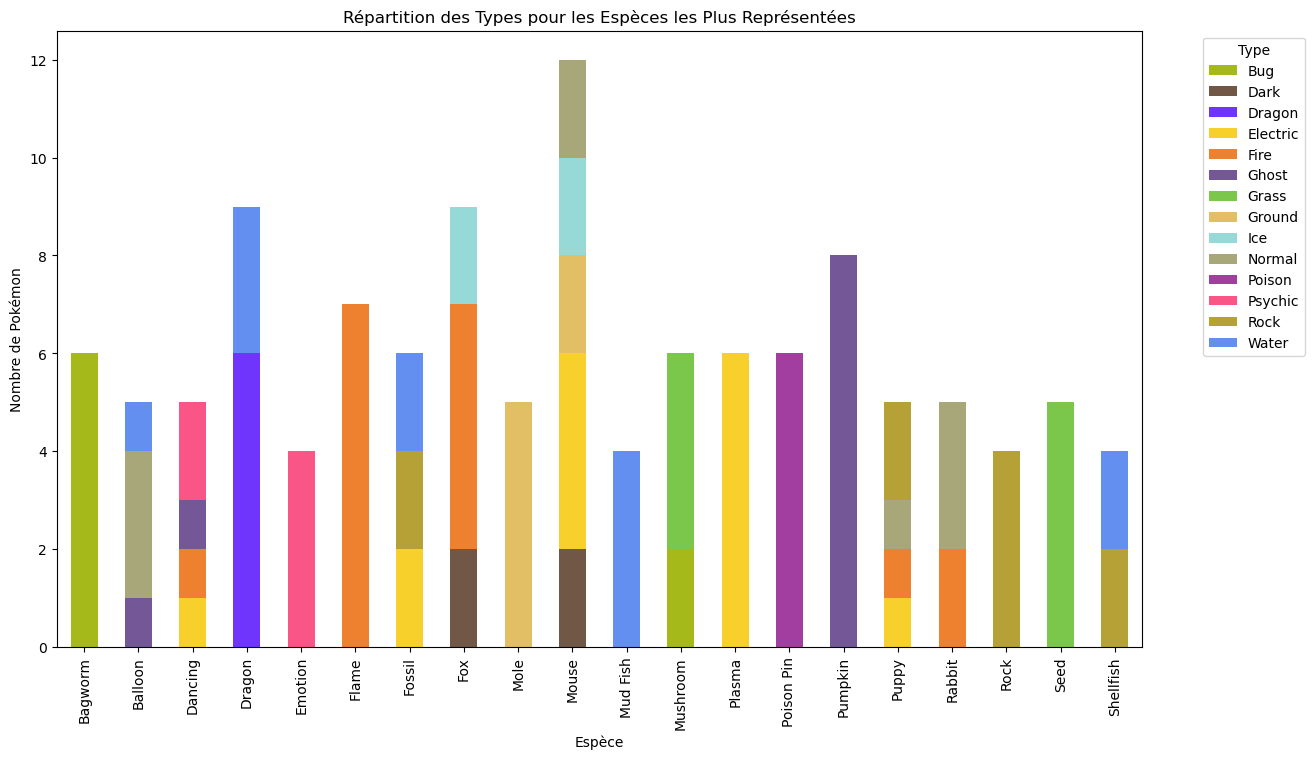

In [61]:
type_counts = filtered_df.groupby(['species', 'type_1']).size().unstack(fill_value=0)

colors = [type_color_dict[type_] for type_ in type_counts.columns]

# stack bar plot
type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
plt.title('Répartition des Types pour les Espèces les Plus Représentées')
plt.xlabel('Espèce')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

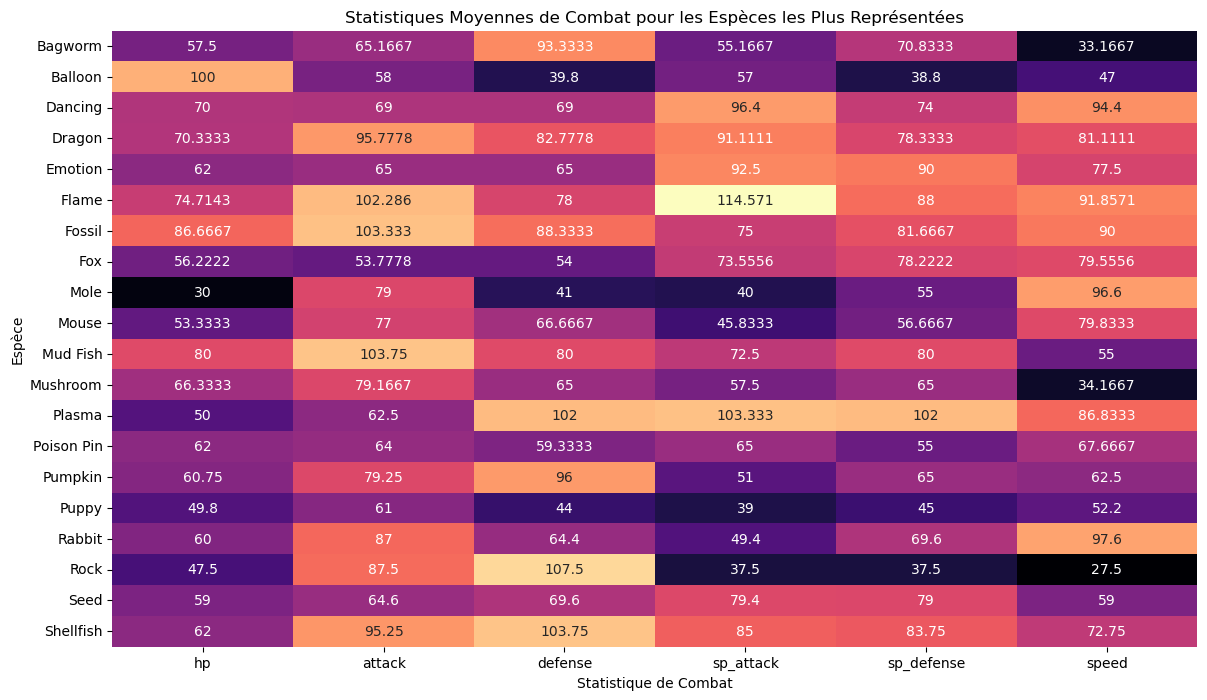

In [100]:
combat_stats = filtered_df.groupby('species')[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()

# heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(combat_stats, annot=True, cmap='magma', cbar=False, fmt='g')
plt.title('Statistiques Moyennes de Combat pour les Espèces les Plus Représentées')
plt.xlabel('Statistique de Combat')
plt.ylabel('Espèce')
plt.show()

Interprétation : Beaucoup des variables présentées ici dépendent de l'espèce. Certaines espèces ont bel et bien un profil type, notamment sur leurs caractéristiques (taille,masse), mais d'autres sont beaucoup moins disciplinées et semblent beaucoup plus aléatoires (surtout sur la masse, la taille semble plus typique à chaque espèce). 

Il est très intéressant de noter que les espèces s'accordent très bien avec leur type (beaucoup de dragons pour dragon, beaucoup de psy pour émotion, beaucoup d'insectes pour bagworm, etc.).

Les espèces présentent aussi des profils type très intéressants dans leur statistiques de combat pures, il semble que les espèces s'accordent aussi assez bien en moyenne avec leur stats : Roche très défensive, Lapin très rapide, flame très offensive, les chiots un peu faibles dans toutes les catégories, etc.

**Réponse** : les espèces forment bien des profils type en termes de taille, type, et statistiques. la masse est une variable qui dépend de l'espèce, certaines sont plus disciplinées que d'autres.

---

## Réponse à la question (12) :

On trace un stacked bar plot horizontal pour voir quels sont les types les plus représentatifs de chaque status :

<Figure size 1400x800 with 0 Axes>

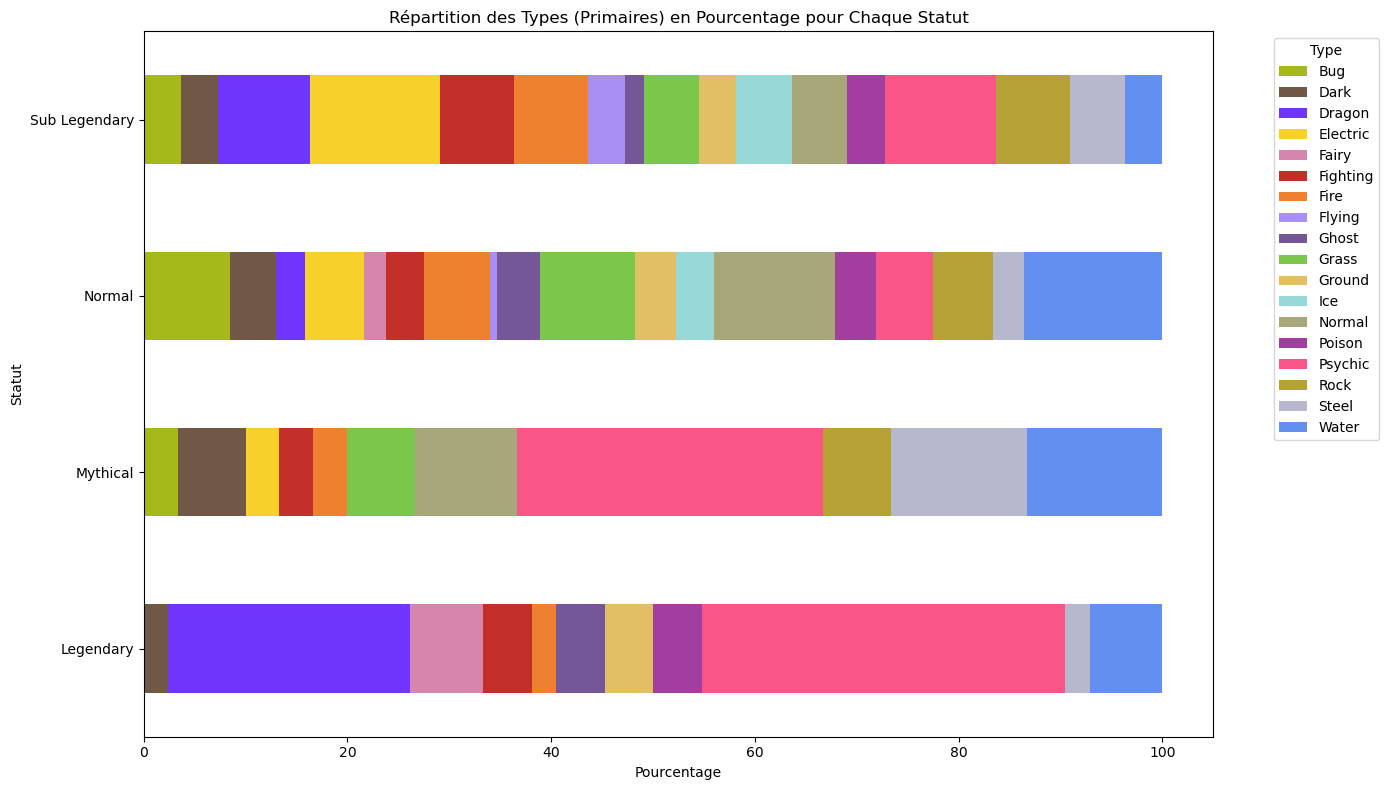

In [127]:
type_counts = dfPokemon.groupby(['status', 'type_1']).size().unstack(fill_value=0)

colors = [type_color_dict[type_] for type_ in type_counts.columns]

type_percentages = type_counts.div(type_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
type_percentages.plot(kind='barh', stacked=True, color=colors, figsize=(14, 8))
plt.title('Répartition des Types (Primaires) en Pourcentage pour Chaque Statut')
plt.xlabel('Pourcentage')
plt.ylabel('Statut')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

On remarque que le type Dragon (encore lui !) est beaucoup plus représenté parmis les Pokémons Légendaires et mythiques

Le type psy est aussi beaucoup plus représentés parmis les Légendaires et mythiques.

Le status normal contient beaucoup plus de pokémons normaux que les autres status.

Ironie du sort, le status mythique contient lui aussi beaucoup de Pokémons de type Normal

Le status semi-légendaire est très équilibré, à la surprise générale, et son type qui le représente le plus est électrique

Réponse : Les status légendaires et mythiques sont beaucoup plus représentés par les types Dragon et Psy, tandis que le status Semi-légendaire n'a pas de type dominant, et forme un tout assez un bien équilibré, comme le status normal.

---

## Réponse à la question (11) :

---

## Réponse à la question (13) :

Nous avions émis l'hypothèse que les pokemons avec un nombre de points élevé avaient plus de chances d'etre légendaire.

> Comment tester le lien entre la variable total_points et le statut?

On va réaliser une **ANOVA** qui est adaptée ici mais avant on va simplement visualiser la distrubution de total_points en fonction du statut :

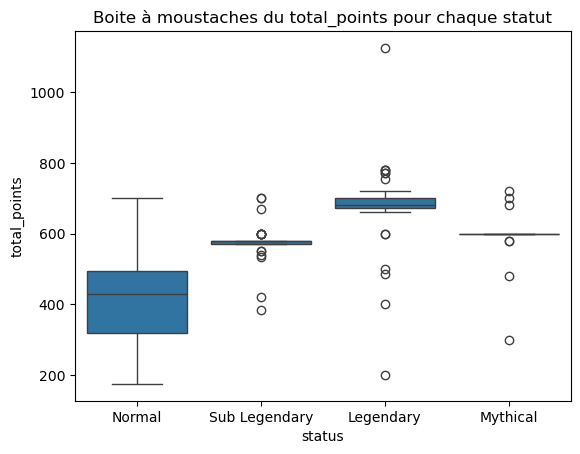

In [158]:
sns.boxplot(x='status',y='total_points',data=dfPokemon)
plt.title("Boite à moustaches du total_points pour chaque statut")
plt.show()

**On constate des valeurs plus élevées pour les status semi-légendaire, legendaire et mythique**

In [167]:
dfPokemon['status'].value_counts()### beaucoup plus de Pokemons normal dans le dataset

status
Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: count, dtype: int64

Comme présenté précedemment, on voit que le dataset a beaucoup plus de pokémons normaux que de pokémons non-normaux

In [208]:
def decision(pval):
    if pval<=0.05:### seuil par défaut
        return "On rejette H0 avec un seuil d'erreur de 5% \n"
    else:
        return "On ne rejette pas H0 \n"

### Posons les hypothèses 
- H0: Pas de différences significatives de moyennes entre les status
- H1: il existe au moins un statut qui différe 

In [176]:
groupes = [dfPokemon[dfPokemon['status'] == statut]['total_points'] for statut in dfPokemon['status'].unique()]

In [186]:
f_stat, p_value = f_oneway(*groupes)#On suppose les hypothese pour appliquer le test valides

In [189]:
p_value# p-value calculée

1.49719602590481e-79

In [192]:
decision(p_value)

"On rejette H0 avec un seuil d'erreur de 5%"

On va completer l'ANOVA qui ne donne pas les groupes ici les statuts qui diffèrent :

In [198]:
status=dfPokemon['status'].unique()#modalités differentes pour la variable status

In [201]:
paires=list(itertools.combinations(status,2))#toutes les paires de status à tester
len(paires)

6

In [210]:
for g1,g2 in paires:
    print(g1,g2)# affiche la paire de status tester
    points1=dfPokemon[dfPokemon['status']==g1]['total_points']
    points2=dfPokemon[dfPokemon['status']==g1]['total_points']
    t_stat, p_val = ttest_ind(points1, points2, equal_var=False)###H0 les moyennes de deux groupes compares sont identiques H1:elles sont differentes
    print(decision(p_val))

Normal Sub Legendary
On ne rejette pas H0 

Normal Legendary
On ne rejette pas H0 

Normal Mythical
On ne rejette pas H0 

Sub Legendary Legendary
On ne rejette pas H0 

Sub Legendary Mythical
On ne rejette pas H0 

Legendary Mythical
On ne rejette pas H0 



_**l'ANOVA a detectée une différence globale entre les statuts mais on n'a pas identifie les status qui different avec les tests réalisés ci-dessus**_

In [217]:
# Test de Tukey
tukey = pairwise_tukeyhsd(endog=dfPokemon['total_points'],
                          groups=dfPokemon['status'],
                          alpha=0.05)

print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2     meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
Legendary      Mythical  -80.6429 0.0056 -143.6062  -17.6795   True
Legendary        Normal -260.0459    0.0 -301.6079 -218.4839   True
Legendary Sub Legendary  -98.7823    0.0 -152.7565   -44.808   True
 Mythical        Normal -179.4031    0.0 -228.2715 -130.5346   True
 Mythical Sub Legendary  -18.1394 0.8632  -77.9219   41.6431  False
   Normal Sub Legendary  161.2637    0.0  124.6991  197.8282   True
-------------------------------------------------------------------


**Les seules groupes qui ne présentent pas de differences sont mythiques et semi-légendaires. La variable total_points permet bien de differencier les status entre eux ce qui  est cohérent**

Réponse : Oui, plus la variable 'total_points' est élevée, plus le pokémon a de chances de ne pas avoir un status normal.

---

# Conclusion 

L’analyse exploratoire menée sur le dataset des Pokémons a permis de mieux comprendre la distribution et les relations entre leurs différentes caractéristiques.

Il apparait clairement que des profils types se forment en fonction de leur type,status